In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

Data Description

BROKERTITLE: Title of the broker

TYPE: Type of the house

PRICE: Price of the house

BEDS: Number of bedrooms

BATH: Number of bathrooms

PROPERTYSQFT: Square footage of the property

ADDRESS: Full address of the house

STATE: State of the house

MAIN_ADDRESS: Main address information

ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information

LOCALITY: Locality information

SUBLOCALITY: Sublocality information

STREET_NAME: Street name

LONG_NAME: Long name

FORMATTED_ADDRESS: Formatted address

LATITUDE: Latitude coordinate of the house

LONGITUDE: Longitude coordinate of the house




In [58]:
df= pd.read_csv('/content/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [59]:
df[df['PRICE'] == df['PRICE'].max()]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418



1.   How many apartments are there? 4801

2.   What are the characteristics of the most expensive apartment?

1.   Transform the size of the apartment to m2.
2.   Which are more expensive per square meters, big apartments or small apartments?

1.   what is the distribution of the prices for the main brokers? Can you find luxury brokers?
2.   what is the most expensive area? the cheapest?

1.   what area has the most variance in prices? and in price per square meter?


In [60]:
# Transform the size of the apartment to m2.
df['PROPERTYSQM']=df['PROPERTYSQFT'] * 0.092903
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PROPERTYSQM
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,130.064200
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,1629.983135
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,187.199545
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,41.341835
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,1316.900025


In [45]:
# Which are more expensive per square meters, big apartments or small apartments?
#df['PRICE_PER_M2'] = df['PRICE'] / df['PROPERTYM2']
# df.groupby(['BROKERTITLE'])['PRICE_PER_M2']
#price_per_m2 = df.sort_values(by=['PRICE_PER_M2'],ascending=True)
#df.groupby('APARTMENT_SIZE')['PRICE'].mean()

In [ ]:
#plt.bar(df['PROPERTYM2'],df['PRICE_PER_M2'])
plt.xlabel("PRICE_PER_M2")
plt.ylabel("PROPERTYM2")



plt.title("most ")
plt.tight_layout()
plt.show()

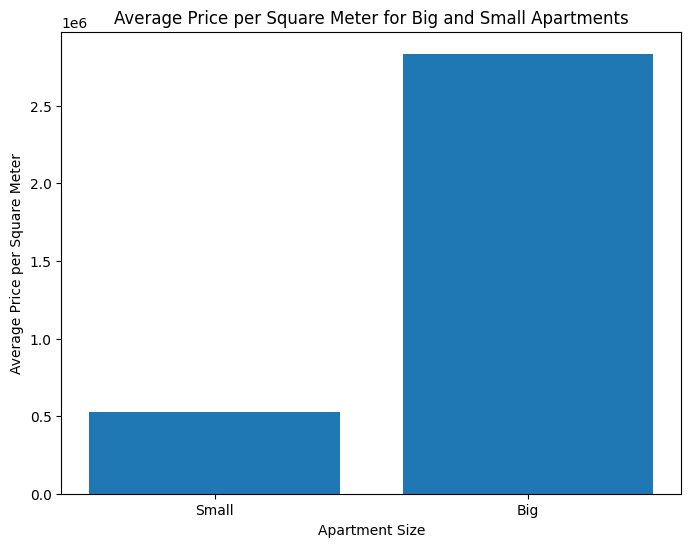

In [61]:
# Categorize apartments as big or small based on their size
df['APARTMENT_SIZE'] = pd.cut(df['PROPERTYSQM'], bins=[0, 100, float('inf')], labels=['Small', 'Big'])

# Calculate the average price per square meter for big and small apartments
avg_price_per_sqm = df.groupby('APARTMENT_SIZE')['PRICE'].mean()

# Create a bar plot to compare average price per square meter
plt.figure(figsize=(8, 6))
plt.bar(avg_price_per_sqm.index, avg_price_per_sqm)
plt.xlabel('Apartment Size')
plt.ylabel('Average Price per Square Meter')
plt.title('Average Price per Square Meter for Big and Small Apartments')
plt.show()

In [63]:
#what is the distribution of the prices for the main brokers? Can you find luxury brokers?
broker_prices = df.groupby('BROKERTITLE')['PRICE'].mean()

BROKERTITLE
Brokered by 1 Oak Real Estate Hub Inc     1.200000e+06
Brokered by 5 Boro Realty Corp            1.051529e+06
Brokered by A J Realty Of Queens Inc      8.990000e+05
Brokered by A P Services Inc              2.295000e+06
Brokered by AAA Young Shuen Realty Inc    1.288000e+06
                                              ...     
Brokered by eXp Realty BKNY               7.443571e+05
Brokered by eXp Realty NYC                7.460000e+05
Brokered by qvtopservice                  4.771249e+05
Built by Toll Brothers                    1.656667e+06
NoBroker                                  1.001181e+06
Name: PRICE, Length: 1036, dtype: float64

In [64]:
# what is the most expensive area? the cheapest?
expensive_area = df.groupby('LOCALITY')['PRICE'].mean().idxmax()
cheapest_area = df.groupby('LOCALITY')['PRICE'].mean().idxmin()
expensive_area, cheapest_area

('New York', 'The Bronx')

In [65]:
#what area has the most variance in prices? and in price per square meter?
# Calculate the variance of prices and price per square meter for each area
price_variance = df.groupby('LOCALITY')['PRICE'].var()
price_per_sqm_variance = df.groupby('LOCALITY')['PRICE'].var() / df.groupby('LOCALITY')['PROPERTYSQM'].mean()

# Find the areas with the most variance in prices and price per square meter
max_price_variance_area = price_variance.idxmax()
max_price_per_sqm_variance_area = price_per_sqm_variance.idxmax()

# Display the areas with the most variance
max_price_variance_area, max_price_per_sqm_variance_area

('New York', 'New York')

In [78]:
df_selected = df[['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'PRICE']]
# Perform one-hot encoding on the 'TYPE' variable
df_encoded = pd.get_dummies(df_selected, columns=['TYPE','PROPERTYSQFT', 'LOCALITY'], drop_first=True)

In [79]:
X = df_encoded.drop('PRICE',axis=1)
y= df_encoded['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
coefficients = regressor.coef_
intercept = regressor.intercept_
coefficients, intercept

(array([  353203.68870869,  1388936.14995909, -3126565.17732081, ...,
          567432.        ,  -136779.25      ,   487945.5       ]),
 809647001798329.4)

In [82]:
y_train_log = np.log(y_train)
regressor_log = LinearRegression()
regressor_log.fit(X_train,y_train_log)

LinearRegression()

In [83]:
coefficients_log = regressor_log.coef_
intercept_log = regressor_log.intercept_
coefficients_log, intercept_log
#The coefficients now represent the percentage change in the predicted price
#for a one-unit increase in the respective predictor variable.

(array([-0.00473274,  0.32124212, -0.40034804, ...,  0.07863808,
         0.04146194,  0.67884159]),
 2323305949.0584135)

In [88]:
tree_regreesor= DecisionTreeRegressor(random_state=42)
tree_regreesor.fit(X_train,y_train)
y_pred_tree = tree_regreesor.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test,y_pred_tree))
rmse_tree

4265650.593734211

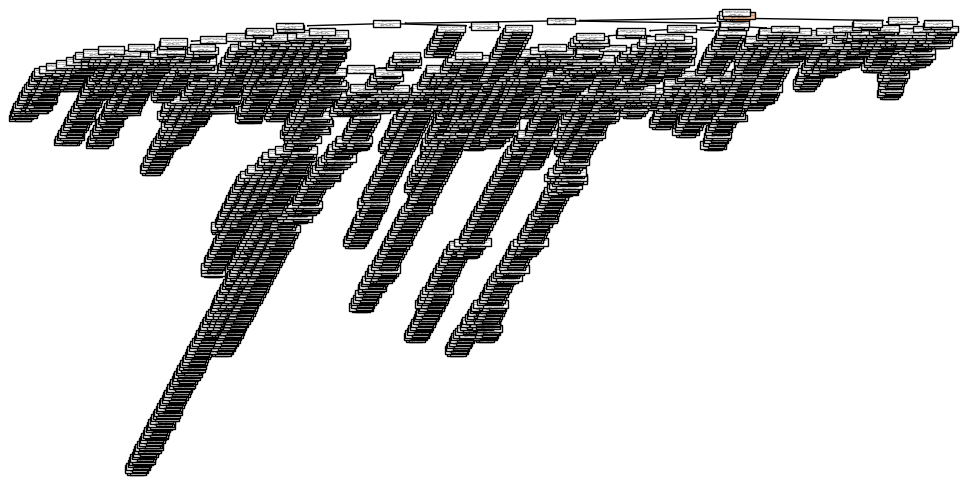

In [91]:
plt.figure(figsize=(12,6))
tree.plot_tree(tree_regreesor,feature_names=X.columns,filled=True)
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params
best_model

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, random_state=42)

In [94]:
best_tree_regreesor= DecisionTreeRegressor(max_depth=3, min_samples_leaf=3,random_state=42)
best_tree_regreesor.fit(X_train,y_train)
y_pred_tree_best = best_tree_regreesor.predict(X_test)
rmse_tree_best = np.sqrt(mean_squared_error(y_test,y_pred_tree_best))
rmse_tree_best

9052002.250079287